Example notebook to recreate Fig. 4 (velocity comparisons between DESI Y1 and SDSS MaNGA) in the DR1 TF paper.

In [1]:
import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

import scipy.stats as stats

# Data

In [2]:
hdul = fits.open('fig4_data.fits')

gals = hdul['SCATTER'].data
dV_Vnorm = hdul['NORM_HIST'].data
dV_sigNorm = hdul['HIST_SIGMA'].data
dV_sigNorm_fit = hdul['HIST_SIGMA_NORM_FIT'].data

hdul.close()

In [3]:
# Reproduce full bin edges array
dV_Vnorm_bins = np.zeros(len(dV_Vnorm) + 1)
dV_Vnorm_bins[:-1] = dV_Vnorm['BIN_EDGE']
dV_Vnorm_bins[-1] = dV_Vnorm['BIN_EDGE'][-1] + (dV_Vnorm['BIN_EDGE'][1] - dV_Vnorm['BIN_EDGE'][0])

dV_sigNorm_bins = np.zeros(len(dV_sigNorm) + 1)
dV_sigNorm_bins[:-1] = dV_sigNorm['BIN_EDGE']
dV_sigNorm_bins[-1] = dV_sigNorm['BIN_EDGE'][-1] + (dV_sigNorm['BIN_EDGE'][1] - dV_sigNorm['BIN_EDGE'][0])

# Plots

## Scatter plot

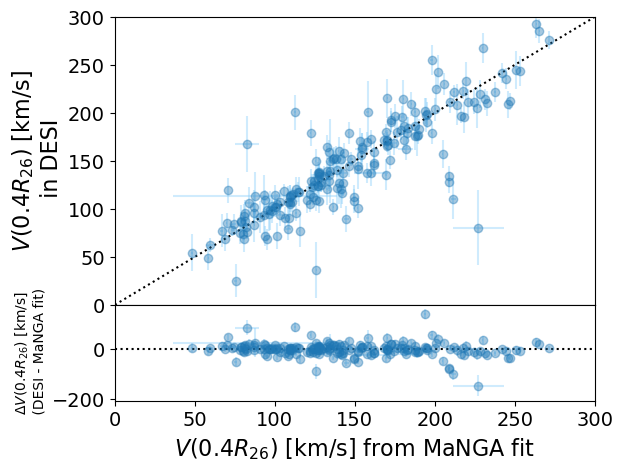

In [4]:
fig = plt.figure()

frame1 = fig.add_axes((0.2, 0.35, 0.75, 0.6))

plt.errorbar(gals['V_MaNGA'], gals['V_DESI'], 
             xerr=gals['V_MANGA_ERR'], 
             yerr=gals['V_DESI_ERR'], 
             fmt='o', 
             ecolor='lightskyblue',
            alpha=0.4)
plt.plot([0, 1000], [0, 1000], 'k:')

plt.xlim(0, 300)
plt.ylim(0, 300)

plt.tick_params(axis='both', which='major', labelsize=14)

plt.ylabel('$V(0.4R_{26})$ [km/s]\n in DESI', fontsize=16)

frame1.axes.get_xaxis().set_visible(False)


frame2 = fig.add_axes((0.2, 0.15, 0.75, 0.2))

plt.errorbar(gals['V_MaNGA'], gals['V_DESI'] - gals['V_MaNGA'], 
             xerr=gals['V_MaNGA_ERR'], 
             yerr=np.sqrt(gals['V_DESI_ERR']**2 + gals['V_MaNGA_ERR']**2), 
             fmt='o', 
             ecolor='lightskyblue',
            alpha=0.4)
plt.hlines(0, 0, 350, linestyles='dotted', colors='k')

plt.xlim(0, 300)

plt.tick_params(axis='both', which='major', labelsize=14)

plt.xlabel('$V(0.4R_{26})$ [km/s] from MaNGA fit', fontsize=16)
plt.ylabel('$\Delta V(0.4R_{26})$ [km/s]\n (DESI - MaNGA fit)');

## Histograms

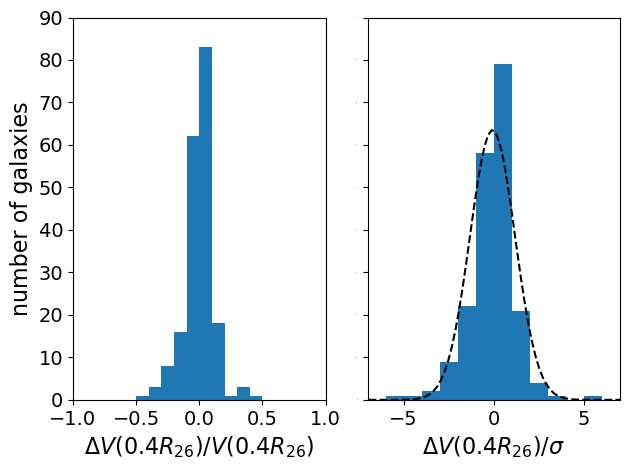

In [5]:
plt.figure(tight_layout=True)


plt.subplot(121)

plt.hist(dV_Vnorm['BIN_EDGE'], 
         dV_Vnorm_bins, 
         weights=dV_Vnorm['N'])

plt.tick_params(axis='both', which='major', labelsize=14)

plt.xlim([-1, 1])
plt.ylim([0, 90])

plt.xlabel('$\Delta V(0.4R_{26}) / V(0.4R_{26})$', fontsize=16)
plt.ylabel('number of galaxies', fontsize=16)


plt.subplot(122)

plt.hist(dV_sigNorm['BIN_EDGE'], 
         dV_sigNorm_bins, 
         weights=dV_sigNorm['N'])

plt.plot(np.linspace(-10,10,100), 
         np.sum(dV_sigNorm['N'])*(dV_sigNorm['BIN_EDGE'][1] - dV_sigNorm['BIN_EDGE'][0])*stats.norm.pdf(np.linspace(-10,10,100), 
                                                                                                        dV_sigNorm_fit['MEAN'], 
                                                                                                        dV_sigNorm_fit['STD_DEV']), 
         linestyle='--', color='k')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='y', labelsize=0)

plt.xlim([-7, 7])
plt.ylim([0, 90])

plt.xlabel('$\Delta V(0.4R_{26}) / \sigma$', fontsize=16);